In [12]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt

# plotting
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# scikit learn - sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from xgboost import XGBRegressor
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.modlabel_encoder = LabelEncoder()
nba_clf['id_posicao_encoded'] = label_encoder.fit_transform(nba_clf['id_posicao'])el_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score,roc_auc_score, roc_curve, RocCurveDisplay
from numpy import mean
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import jaccard_score
from sklearn.decomposition import PCA 
# radiografia de nulos
import missingno as msno
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

import os
os.chdir(os.path.abspath(os.curdir))
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#### Dataset NBA c/ Feature Engineering

df_nba['taxa_faltas'] = (df_nba['media_faltas'] * ((df_nba['faltas_graves'] * 2) + (df_nba['faltas_tecnicas'] * 1.5))) / df_nba['media_minutos']
df_nba['proporcao_faltas'] = df_nba['faltas_graves'] / (df_nba['faltas_graves'] + df_nba['faltas_tecnicas'] + 1e-5)
df_nba['rebotes_por_minuto'] = df_nba['rebotes'] / df_nba['minutos']
df_nba['tocos_roubos_por_minuto'] = (df_nba['tocos'] + df_nba['roubos']) / df_nba['minutos']
df_nba['impacto_defensivo'] = (df_nba['rebotes'] + df_nba['tocos'] - (df_nba['faltas_graves'] * 1.5)) / df_nba['minutos']
df_nba['pontos_por_minuto'] = df_nba['pontos'] / df_nba['minutos']
df_nba['eficiencia_3pontos'] = df_nba['media_cestas_3pontos'] * df_nba['pct_3pontos']
df_nba['eficiencia_lances_livres'] = df_nba['media_lances_livres'] * df_nba['pct_lances_livres']
df_nba['contribuicao_ofensiva'] = (df_nba['pontos'] + df_nba['assistencias']) / df_nba['minutos']
df_nba['prop_tentativas_3pontos'] = df_nba['tentativas_3pontos'] / (df_nba['tentativas_cestas'] + 1e-5)
df_nba['prop_lances_livres'] = df_nba['lances_livres_feitos'] / (df_nba['pontos'] + 1e-5)
df_nba['taxa_erros_assistencias'] = df_nba['erro_passes'] / (df_nba['assistencias'] + 1e-5)

In [5]:
df = pd.read_csv('dataset_ml_completo__fe__05122024.csv')

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df[:5]

,id_jogador,id_posicao,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,ranking_salario,idade,idade_na_temporada,idade_completa,salario_,altura,peso,taxa_faltas,proporcao_faltas,rebotes_por_minuto,tocos_roubos_por_minuto,impacto_defensivo,pontos_por_minuto,eficiencia_3pontos,eficiencia_lances_livres,contribuicao_ofensiva,prop_tentativas_3pontos,prop_lances_livres,taxa_erros_assistencias
0,366,SG,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,15,49,1,23,9000000.0,2.03,102.322075,0.369347,0.0,0.118593,0.058794,0.122111,0.645226,35.217758,557.028762,0.757286,0.188447,0.277259,0.748879
1,366,SG,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,27,49,1,24,10125000.0,2.03,101.694366,1.022082,0.0,0.093586,0.052226,0.095338,0.697161,43.355229,450.145440,0.812128,0.150606,0.222222,0.701219
2,366,SG,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,17,49,1,25,11250000.0,2.03,102.576622,1.332326,0.0,0.091641,0.066465,0.098355,0.740853,44.205102,670.385223,0.849950,0.168781,0.265066,0.729231
3,366,SG,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,14,49,1,26,12375000.0,2.03,101.864983,0.700229,0.0,0.102593,0.069031,0.107551,0.718154,37.835820,642.809559,0.844394,0.160575,0.252257,0.716012
4,366,SG,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,11,49,1,27,13500000.0,2.03,102.447159,0.513056,0.0,0.098709,0.068293,0.102439,0.649067,28.398937,538.344147,0.779340,0.156186,0.251989,0.629956


In [58]:
df.columns

Index(['id_jogador', 'id_posicao', 'jogos_jogados', 'media_minutos',
       'media_faltas', 'faltas_graves', 'faltas_tecnicas', 'expulsoes',
       'double_double', 'triple_double', 'minutos', 'rebotes', 'faltas',
       'media_rebotes', 'media_pontos', 'media_cestas',
       'media_tentativas_cestas', 'pct_cestas', 'media_cestas_3pontos',
       'media_tentativas_3pontos', 'pct_3pontos', 'media_lances_livres',
       'media_tentativas_lances_livres', 'pct_lances_livres',
       'media_assistencias', 'media_erro_passes', 'pontos', 'cestas_feitas',
       'tentativas_cestas', 'cestas_3pontos_feitas', 'tentativas_3pontos',
       'lances_livres_feitos', 'tentativas_lances_livres', 'assistencias',
       'erro_passes', 'media_roubos', 'media_tocos', 'roubos', 'tocos',
       'ranking_salario', 'idade', 'idade_na_temporada', 'idade_completa',
       'salario_', 'altura', 'peso', 'taxa_faltas', 'proporcao_faltas',
       'rebotes_por_minuto', 'tocos_roubos_por_minuto', 'impacto_defensivo',


#### Balanço de Classes

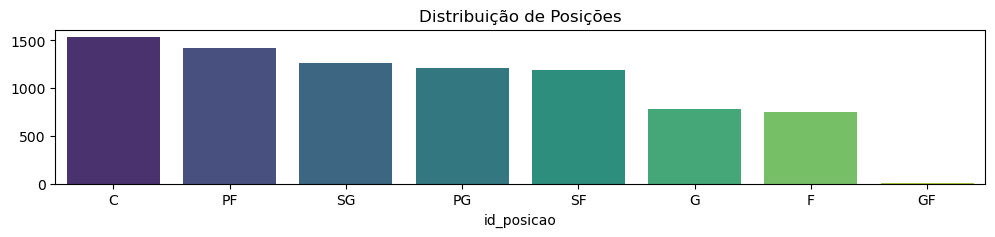

In [8]:
plt.figure(figsize=(12, 2))
sns.barplot(x=df.id_posicao.value_counts().index, 
            y=df.id_posicao.value_counts().values, 
            palette='viridis')
plt.title("Distribuição de Posições")
plt.show()

#### Select KBest

In [254]:
import pandas as pd

# Supondo que seu DataFrame se chame `df`
# Substituir os valores de altura e peso por suas medianas por jogador
df['altura_mediana'] = df.groupby('id_jogador')['altura'].transform('median')
df['peso_mediano'] = df.groupby('id_jogador')['peso'].transform('median')

# Atualizar as colunas altura e peso com os valores medianos
df['altura'] = df['altura_mediana']
df['peso'] = df['peso_mediano']

# Remover as colunas auxiliares (se não forem mais necessárias)
df.drop(['altura_mediana', 'peso_mediano'], axis=1, inplace=True)

# Confirmar a operação
print("Dados de altura e peso atualizados com a mediana por jogador!")


Dados de altura e peso atualizados com a mediana por jogador!


In [350]:
features = ['id_jogador', 'id_posicao', 'jogos_jogados', 'media_minutos',
       'media_faltas', 'faltas_graves', 'faltas_tecnicas', 'expulsoes',
       'double_double', 'triple_double', 'minutos', 'rebotes', 'faltas',
       'media_rebotes', 'media_pontos', 'media_cestas',
       'media_tentativas_cestas', 'pct_cestas', 'media_cestas_3pontos',
       'media_tentativas_3pontos', 'pct_3pontos', 'media_lances_livres',
       'media_tentativas_lances_livres', 'pct_lances_livres',
       'media_assistencias', 'media_erro_passes', 'pontos', 'cestas_feitas',
       'tentativas_cestas', 'cestas_3pontos_feitas', 'tentativas_3pontos',
       'lances_livres_feitos', 'tentativas_lances_livres', 'assistencias',
       'erro_passes', 'media_roubos', 'media_tocos', 'roubos', 'tocos',
       'ranking_salario', 'idade', 'idade_na_temporada', 'idade_completa',
       'salario_', 'altura', 'peso', 'taxa_faltas', 'proporcao_faltas',
       'rebotes_por_minuto', 'tocos_roubos_por_minuto', 'impacto_defensivo',
       'pontos_por_minuto', 'eficiencia_3pontos', 'eficiencia_lances_livres',
       'contribuicao_ofensiva', 'prop_tentativas_3pontos',
       'prop_lances_livres', 'taxa_erros_assistencias']
nba_clf = df.loc[:, df.columns]

In [351]:
label_encoder = LabelEncoder()
nba_clf['id_posicao_encoded'] = label_encoder.fit_transform(nba_clf['id_posicao'])

In [352]:
X = nba_clf.drop(columns=['id_posicao_encoded', 'id_posicao'])
y = nba_clf['id_posicao_encoded']

In [353]:
# Aplicar o SelectKBest com ANOVA F-score
k = 5  # Número de melhores features
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

In [354]:
# Recuperar os nomes das melhores features
selected_features = X.columns[selector.get_support()].tolist()
print("Melhores features selecionadas:", selected_features)

Melhores features selecionadas: ['media_assistencias', 'media_tocos', 'peso', 'rebotes_por_minuto', 'impacto_defensivo']


In [355]:
selected_features.append('id_posicao')

In [356]:
nba_clf = nba_clf.loc[:, selected_features]
nba_clf.columns

Index(['media_assistencias', 'media_tocos', 'peso', 'rebotes_por_minuto',
       'impacto_defensivo', 'id_posicao'],
      dtype='object')

#### Label Encoder

In [357]:
# Crie o encoder
label_encoder = LabelEncoder()

# Aplique o Label Encoder na coluna 'id_posicao'
nba_clf['id_posicao_encoded'] = label_encoder.fit_transform(nba_clf['id_posicao'])

# Verifique a correspondência entre os rótulos e os números
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapeamento de Labels:", label_mapping)

Mapeamento de Labels: {'C': 0, 'F': 1, 'G': 2, 'GF': 3, 'PF': 4, 'PG': 5, 'SF': 6, 'SG': 7}


In [358]:
nba_clf_ = nba_clf.drop(columns=['id_posicao'])

#### Verificação de Força Linear

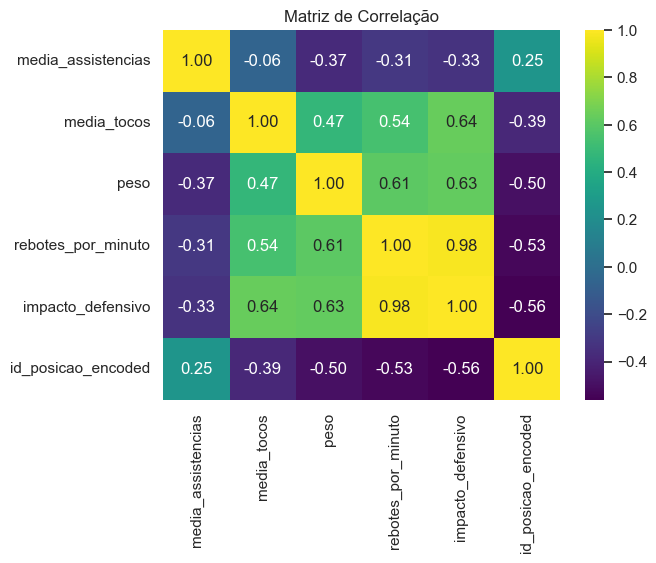

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = nba_clf_.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title("Matriz de Correlação")
plt.show()

### DBScan - Density-Based Spatial Clustering of Applications with Noise

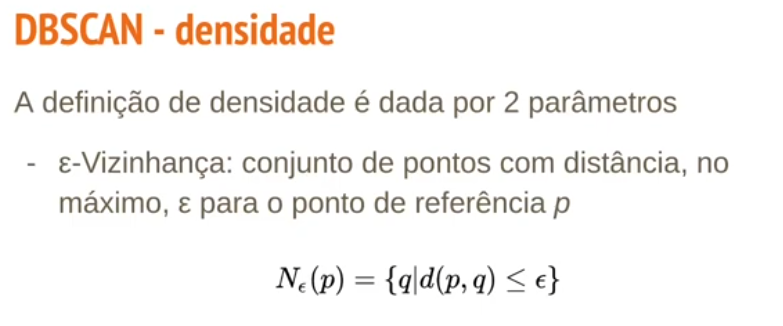


In [360]:
# conjunto de pontos com distancia no maximom epsilon para o ponto p...
# meu epsilon vizinhanca de um dado ponto "p", é o conjunto de outros pontos "q"|tal 
# que a distancia de "p" para "q" seja menor do que o "E" Epsilon

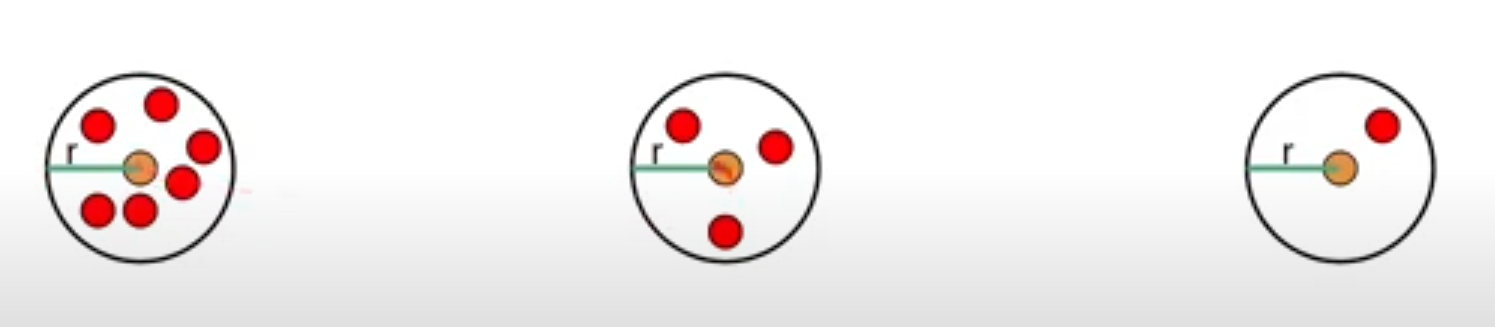

#### Tipos de pontos

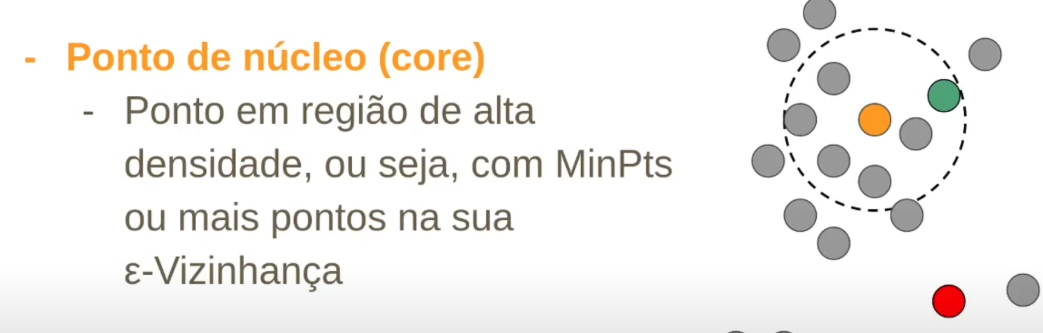

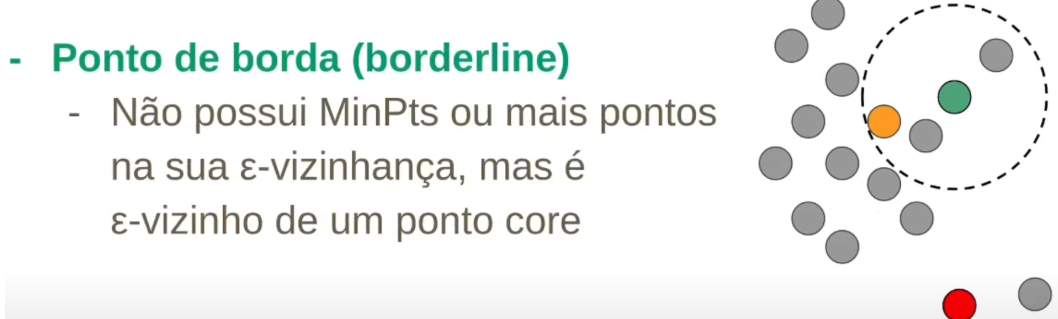

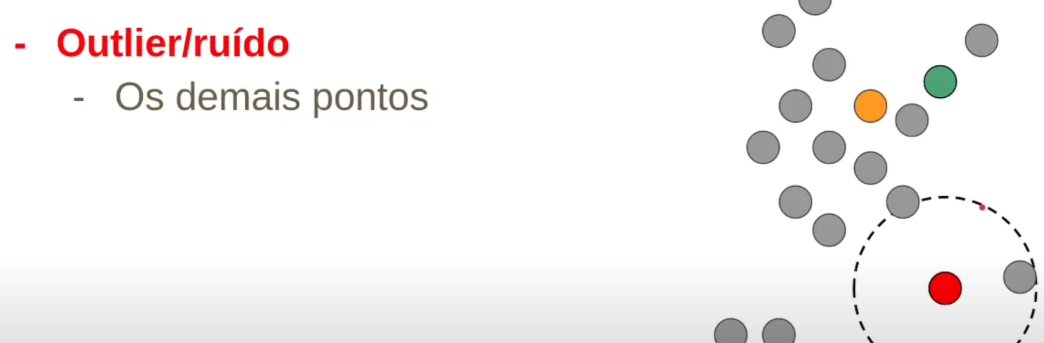

### Alcançabilidade

#### Todo ponto na E-vizinhanca de um ponto de núcleo p é dito diretamente alcançavel (por densidade) por p

#### Caso haja uma corrente de pontos diretamente alcançáveis de "p" a "q", dizemos que q é (indiretamente) alcançavel por p

In [371]:
# o ponto p é diretamente alcançável pelo ponto p1
# o ponto p é indiretamente alcançável pelo ponto q, pq? Ponto p nao e ponto de nucleo.
# p <- p1 <- q formam uma cadeia

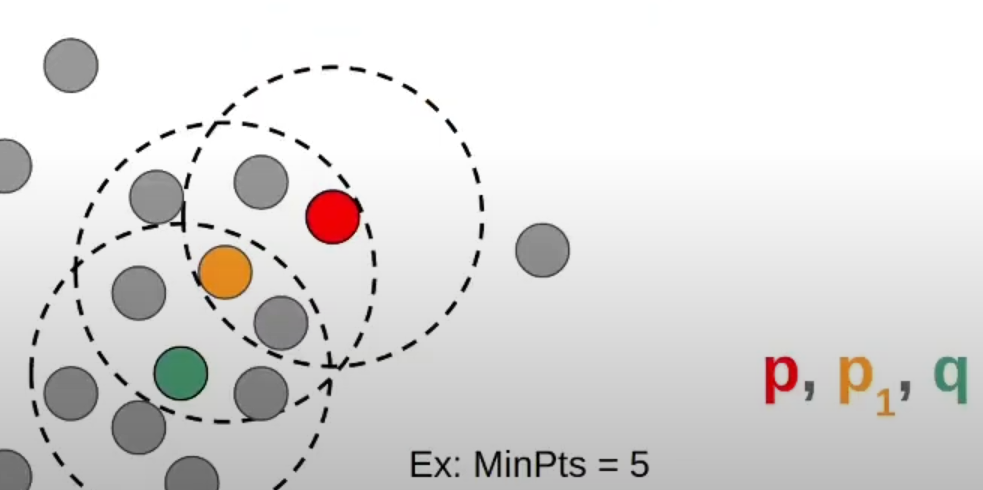

#### O algoritmo

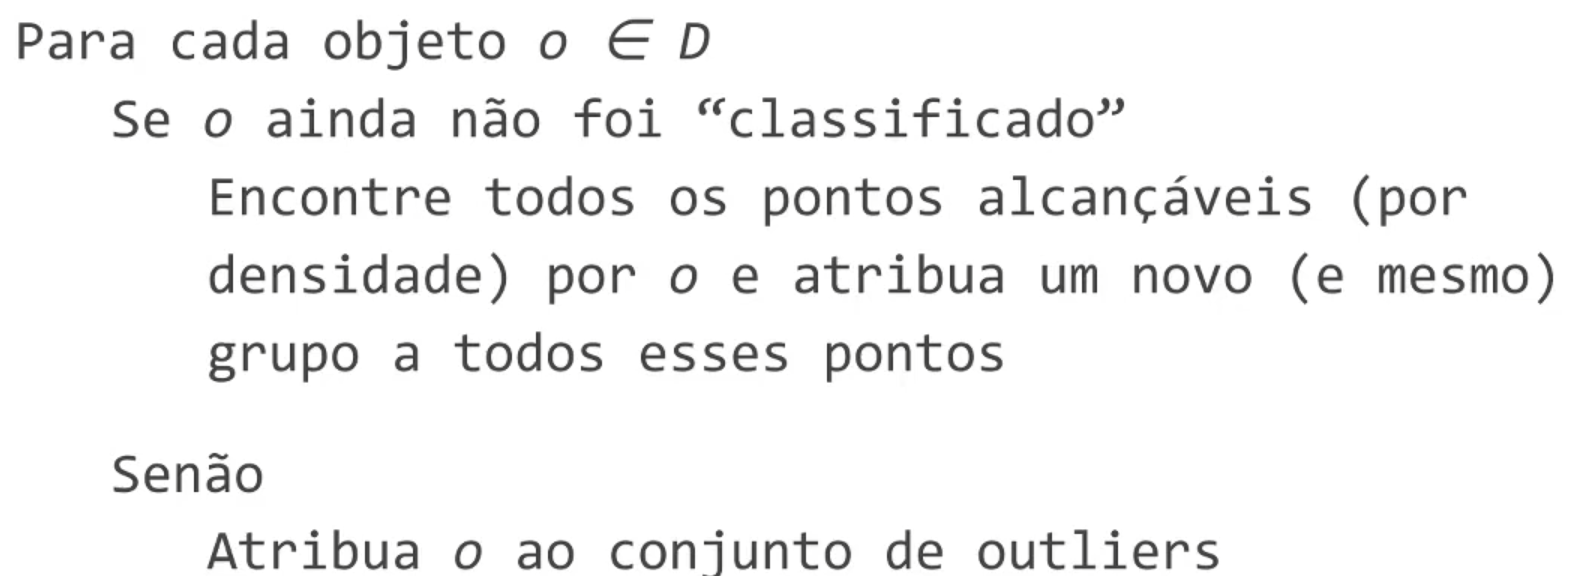

#### Scaler

In [361]:
from sklearn.preprocessing import normalize, Normalizer, StandardScaler, MinMaxScaler
X = nba_clf_.drop(columns=['id_posicao_encoded', 'rebotes_por_minuto'], axis=1)
scaler = Normalizer()
X_scaled = scaler.fit_transform(X)

#### Descobrindo o E-psilon

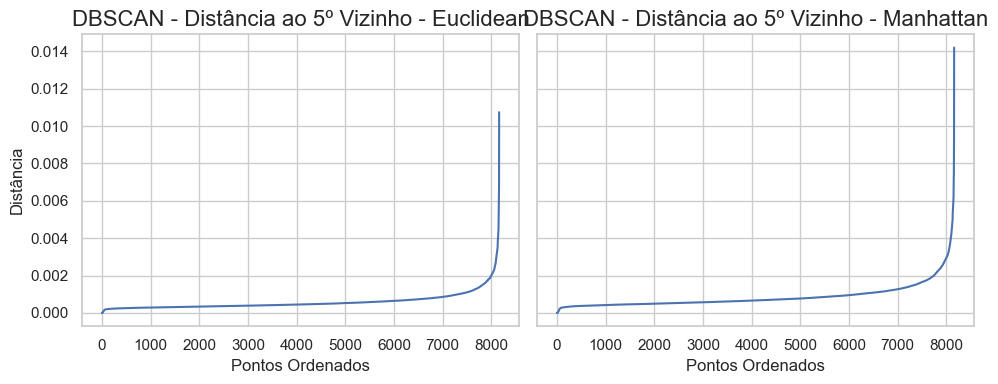

Euclidean:
DBSCAN - Distância EPS calculada pelo Percentil 95: 0.0013723137635135738
DBSCAN - Distância EPS calculada pela Média: 0.000593080511531988

Manhattan:
DBSCAN - Distância EPS calculada pelo Percentil 95: 0.002015851556677226
DBSCAN - Distância EPS calculada pela Média: 0.0008699247331745139


In [362]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Número de vizinhos
n_ = 5

# Calcular as distâncias com métrica Euclidean
neighbors_euclidean = NearestNeighbors(n_neighbors=n_, p=2).fit(X_scaled)  # p=2 para Euclidean
distances_euclidean, indices_euclidean = neighbors_euclidean.kneighbors(X_scaled)

# Calcular as distâncias com métrica Manhattan
neighbors_manhattan = NearestNeighbors(n_neighbors=n_, p=1).fit(X_scaled)  # p=1 para Manhattan
distances_manhattan, indices_manhattan = neighbors_manhattan.kneighbors(X_scaled)

# Ordenar as distâncias (para o n-ésimo vizinho)
distances_euclidean = np.sort(distances_euclidean[:, n_ - 1])
distances_manhattan = np.sort(distances_manhattan[:, n_ - 1])

# Plotar as duas métricas lado a lado
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Gráfico para Euclidean
ax[0].plot(distances_euclidean)
ax[0].set_title(f'DBSCAN - Distância ao {n_}º Vizinho - Euclidean', fontsize=16)
ax[0].set_xlabel('Pontos Ordenados')
ax[0].set_ylabel('Distância')
ax[0].grid(True)

# Gráfico para Manhattan
ax[1].plot(distances_manhattan)
ax[1].set_title(f'DBSCAN - Distância ao {n_}º Vizinho - Manhattan', fontsize=16)
ax[1].set_xlabel('Pontos Ordenados')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Calcular os valores de eps (média e percentil 95)
eps_value95_euclidean = np.percentile(distances_euclidean, 95)
eps_media_euclidean = np.mean(distances_euclidean)

eps_value95_manhattan = np.percentile(distances_manhattan, 95)
eps_media_manhattan = np.mean(distances_manhattan)

# Exibir os resultados
print("Euclidean:")
print(f"DBSCAN - Distância EPS calculada pelo Percentil 95: {eps_value95_euclidean}")
print(f"DBSCAN - Distância EPS calculada pela Média: {eps_media_euclidean}\n")

print("Manhattan:")
print(f"DBSCAN - Distância EPS calculada pelo Percentil 95: {eps_value95_manhattan}")
print(f"DBSCAN - Distância EPS calculada pela Média: {eps_media_manhattan}")


#### Descobrindo o Min-Samples

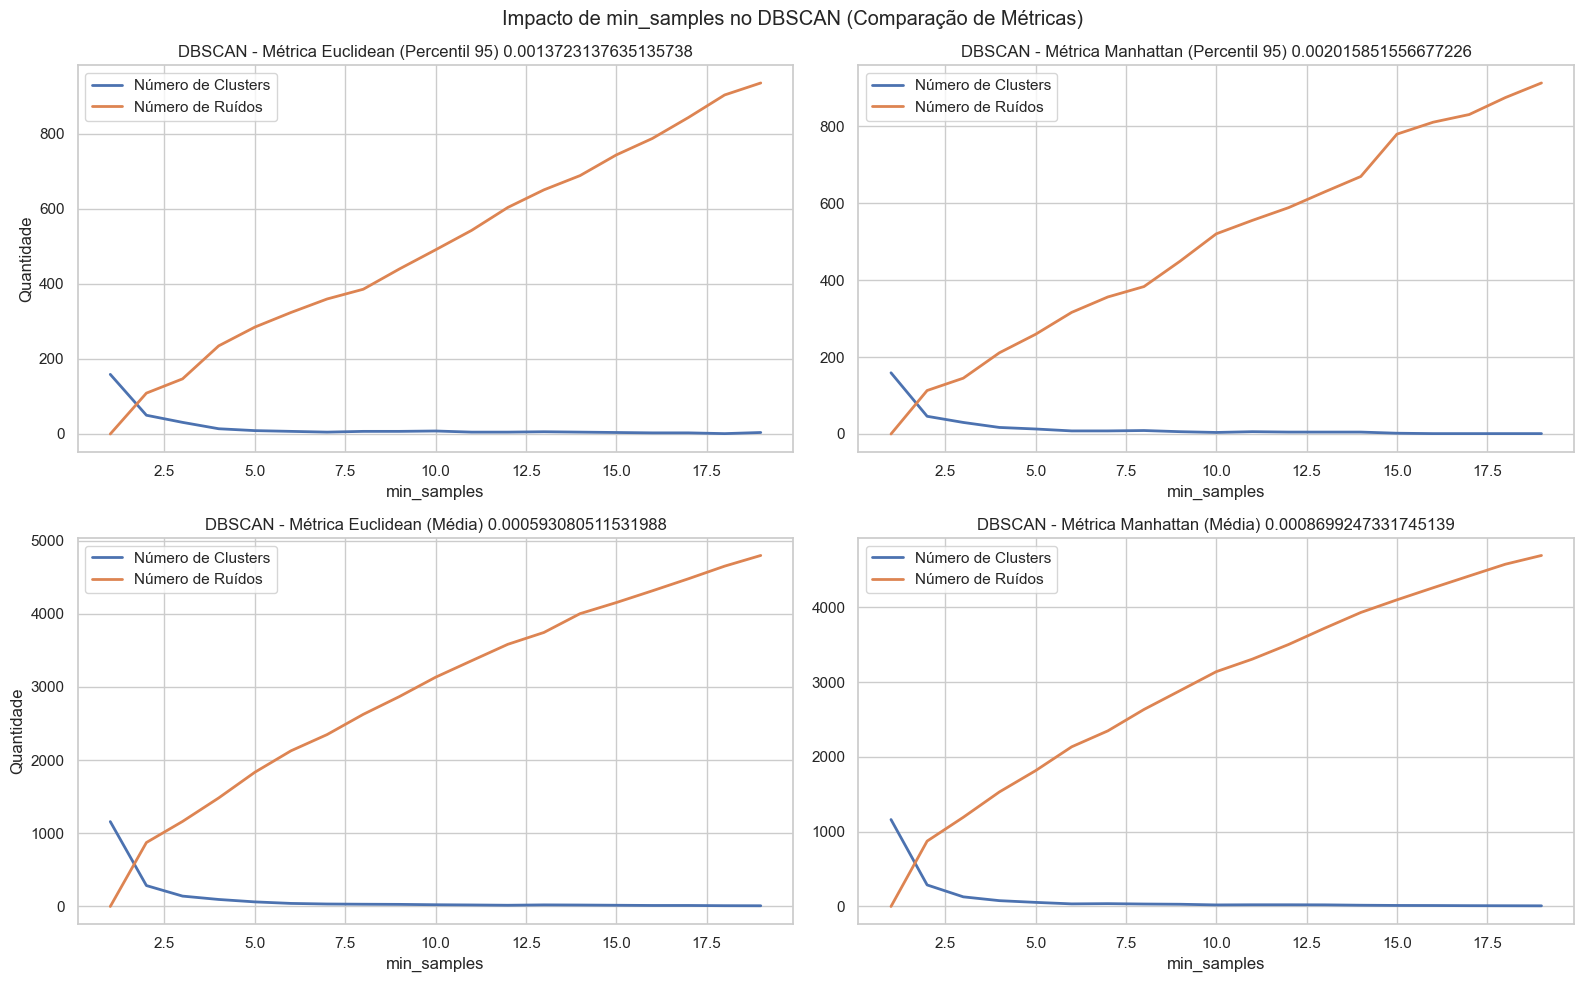

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN

# Testar diferentes valores de min_samples
results_euclidean = []
results_euclidean_med = []
results_manhattan = []
results_manhattan_med = []

# Garantir que os valores de eps sejam definidos antes
eps_value95_euclidean = np.percentile(distances_euclidean, 95)
eps_media_euclidean = np.mean(distances_euclidean)
eps_value95_manhattan = np.percentile(distances_manhattan, 95)
eps_media_manhattan = np.mean(distances_manhattan)

for min_samples in range(1, 20, 1):
    # DBSCAN com métrica Euclidean (Percentil 95)
    dbscan_euclidean = DBSCAN(eps=eps_value95_euclidean, min_samples=min_samples, metric='euclidean').fit(X_scaled)
    labels_euclidean = dbscan_euclidean.labels_
    n_clusters_euclidean = len(set(labels_euclidean)) - (1 if -1 in labels_euclidean else 0)
    n_noise_euclidean = list(labels_euclidean).count(-1)
    results_euclidean.append((min_samples, n_clusters_euclidean, n_noise_euclidean))

    # DBSCAN com métrica Euclidean (Média)
    dbscan_euclidean_med = DBSCAN(eps=eps_media_euclidean, min_samples=min_samples, metric='euclidean').fit(X_scaled)
    labels_euclidean_med = dbscan_euclidean_med.labels_
    n_clusters_euclidean_med = len(set(labels_euclidean_med)) - (1 if -1 in labels_euclidean_med else 0)
    n_noise_euclidean_med = list(labels_euclidean_med).count(-1)
    results_euclidean_med.append((min_samples, n_clusters_euclidean_med, n_noise_euclidean_med))

    # DBSCAN com métrica Manhattan (Percentil 95)
    dbscan_manhattan = DBSCAN(eps=eps_value95_manhattan, min_samples=min_samples, metric='manhattan').fit(X_scaled)
    labels_manhattan = dbscan_manhattan.labels_
    n_clusters_manhattan = len(set(labels_manhattan)) - (1 if -1 in labels_manhattan else 0)
    n_noise_manhattan = list(labels_manhattan).count(-1)
    results_manhattan.append((min_samples, n_clusters_manhattan, n_noise_manhattan))

    # DBSCAN com métrica Manhattan (Média)
    dbscan_manhattan_med = DBSCAN(eps=eps_media_manhattan, min_samples=min_samples, metric='manhattan').fit(X_scaled)
    labels_manhattan_med = dbscan_manhattan_med.labels_
    n_clusters_manhattan_med = len(set(labels_manhattan_med)) - (1 if -1 in labels_manhattan_med else 0)
    n_noise_manhattan_med = list(labels_manhattan_med).count(-1)
    results_manhattan_med.append((min_samples, n_clusters_manhattan_med, n_noise_manhattan_med))

# Converter os resultados para numpy arrays
results_euclidean = np.array(results_euclidean)
results_euclidean_med = np.array(results_euclidean_med)
results_manhattan = np.array(results_manhattan)
results_manhattan_med = np.array(results_manhattan_med)

# Configuração de Seaborn
sns.set(style="whitegrid")

# Criar quatro gráficos lado a lado
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)

# Gráfico 1: Euclidean com Percentil 95
sns.lineplot(x=results_euclidean[:, 0], y=results_euclidean[:, 1], label='Número de Clusters', ax=axes[0, 0], lw=2)
sns.lineplot(x=results_euclidean[:, 0], y=results_euclidean[:, 2], label='Número de Ruídos', ax=axes[0, 0], lw=2)
axes[0, 0].set_title(f"DBSCAN - Métrica Euclidean (Percentil 95) {eps_value95_euclidean}")
axes[0, 0].set_xlabel("min_samples")
axes[0, 0].set_ylabel("Quantidade")
axes[0, 0].legend()
axes[0, 0].grid(True)

# Gráfico 2: Manhattan com Percentil 95
sns.lineplot(x=results_manhattan[:, 0], y=results_manhattan[:, 1], label='Número de Clusters', ax=axes[0, 1], lw=2)
sns.lineplot(x=results_manhattan[:, 0], y=results_manhattan[:, 2], label='Número de Ruídos', ax=axes[0, 1], lw=2)
axes[0, 1].set_title(f"DBSCAN - Métrica Manhattan (Percentil 95) {eps_value95_manhattan}")
axes[0, 1].set_xlabel("min_samples")
axes[0, 1].legend()
axes[0, 1].grid(True)

# Gráfico 3: Euclidean com Média
sns.lineplot(x=results_euclidean_med[:, 0], y=results_euclidean_med[:, 1], label='Número de Clusters', ax=axes[1, 0], lw=2)
sns.lineplot(x=results_euclidean_med[:, 0], y=results_euclidean_med[:, 2], label='Número de Ruídos', ax=axes[1, 0], lw=2)
axes[1, 0].set_title(f"DBSCAN - Métrica Euclidean (Média) {eps_media_euclidean}")
axes[1, 0].set_xlabel("min_samples")
axes[1, 0].set_ylabel("Quantidade")
axes[1, 0].legend()
axes[1, 0].grid(True)

# Gráfico 4: Manhattan com Média
sns.lineplot(x=results_manhattan_med[:, 0], y=results_manhattan_med[:, 1], label='Número de Clusters', ax=axes[1, 1], lw=2)
sns.lineplot(x=results_manhattan_med[:, 0], y=results_manhattan_med[:, 2], label='Número de Ruídos', ax=axes[1, 1], lw=2)
axes[1, 1].set_title(f"DBSCAN - Métrica Manhattan (Média) {eps_media_manhattan}")
axes[1, 1].set_xlabel("min_samples")
axes[1, 1].legend()
axes[1, 1].grid(True)

# Ajustar layout
plt.suptitle(f"Impacto de min_samples no DBSCAN (Comparação de Métricas)")
plt.tight_layout()
plt.show()


#### Testando os min_samples do teste acima

In [366]:
# min_samples, n_clusters_, n_noise_
# results_euclidean results_euclidean_med results_manhattan results_manhattan_med 
print(f"Resultados da metrica escolhida: \n")
(pd.DataFrame(results_euclidean[:10], 
              columns=["MinSamples", "Clusters", "Ruído"])
              .set_index("MinSamples"))

Resultados da metrica escolhida: 



,Clusters,Ruído
MinSamples,,
1,159,0
2,50,109
3,31,147
4,14,235
5,9,285
6,7,324
7,5,360
8,7,386
9,7,440


In [368]:
eps_value95_euclidean = np.percentile(distances_euclidean, 95)
eps_media_euclidean = np.mean(distances_euclidean)
eps_value95_manhattan = np.percentile(distances_manhattan, 95)
eps_media_manhattan = np.mean(distances_manhattan)

ms_= 5
dbscan = DBSCAN(eps=eps_value95_manhattan, min_samples=ms_, metric='manhattan').fit(X_scaled)
labels = dbscan.labels_
print('METRICAS EUCLIDIANAS')
print(set(labels))

# valores e os indices e os rótulos e os ruidos
print(f"TOTAL DE ELEMENTOS: {len(labels)}")
print(f"TOTAL DE COMPONENTES: {len(dbscan.components_)}")
print(f"TOTAL DO RUÍDO: {len(nba_clf[labels == -1])}, TAXA DE RUÍDO: {len(nba_clf[labels == -1])/len(labels):3F}%")

METRICAS EUCLIDIANAS
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1}
TOTAL DE ELEMENTOS: 8162
TOTAL DE COMPONENTES: 7753
TOTAL DO RUÍDO: 259, TAXA DE RUÍDO: 0.031732%


#### Passando os Rótulos para o DF

In [369]:
clusters_df = nba_clf.assign(cluster=dbscan.labels_).sort_values("id_posicao")
clusters_df

,media_assistencias,media_tocos,peso,rebotes_por_minuto,impacto_defensivo,id_posicao,id_posicao_encoded,cluster
4080,2.432836,1.417911,108.860000,0.278323,0.320696,C,0,0
2182,0.000000,0.500000,112.928978,0.300000,0.400000,C,0,0
5927,0.130435,0.826087,113.505512,0.286652,0.369803,C,0,0
5928,0.100000,0.266667,113.505512,0.287671,0.342466,C,0,0
5944,0.254902,0.215686,112.515678,0.249476,0.272537,C,0,0
...,...,...,...,...,...,...,...,...
1151,2.958333,0.263889,106.249393,0.114694,0.121656,SG,7,0
5931,0.500000,0.000000,102.617348,0.131148,0.131148,SG,7,0
5930,0.866667,0.333333,102.617348,0.190383,0.208538,SG,7,0
5728,2.081967,0.147541,90.720000,0.076869,0.083216,SG,7,0


#### Retirando o CLuster 0 e o -1

In [343]:
clusters_df_sr =clusters_df[~clusters_df['cluster'].isin([-1, 0])]

#### Plotando os Clusterings

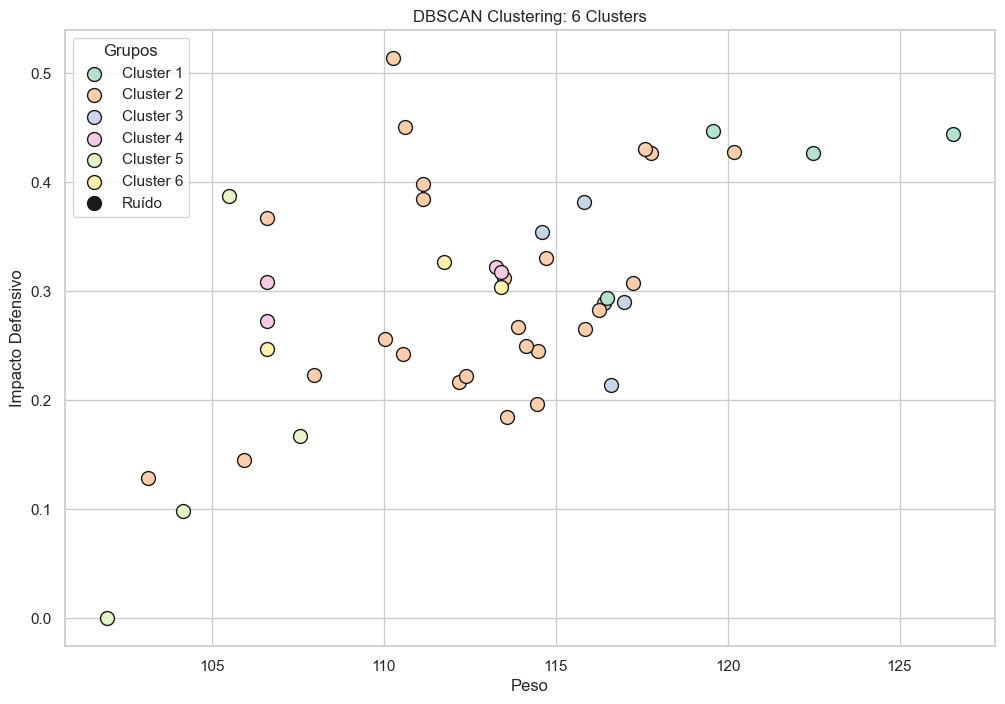

In [344]:
# Obter os rótulos únicos e criar um mapeamento de cores
_df = clusters_df_sr.copy()
unique_labels = set(_df['cluster'])
colours = {label: plt.cm.Pastel2(i) for i, label in enumerate(unique_labels)}
colours[-1] = 'k'  # Ruídos em preto

# Criar o gráfico
plt.figure(figsize=(12, 8))
for label, color in colours.items():
    # Filtrar os pontos do cluster atual no DataFrame
    cluster_points = _df[_df['cluster'] == label]

    # Plotar os pontos do cluster usando 'peso' e 'impacto_defensivo'
    plt.scatter(
        cluster_points['peso'], cluster_points['impacto_defensivo'],
        c=[color], label=f"Cluster {label}" if label != -1 else "Ruído",
        edgecolor='k', s=100
    )

# Adicionar título, eixos e legenda
plt.title(f"DBSCAN Clustering: {len(unique_labels) - (1 if -1 in unique_labels else 0)} Clusters")
plt.xlabel("Peso")
plt.ylabel("Impacto Defensivo")
plt.legend(loc="best", title="Grupos")
plt.grid(True)
plt.show()


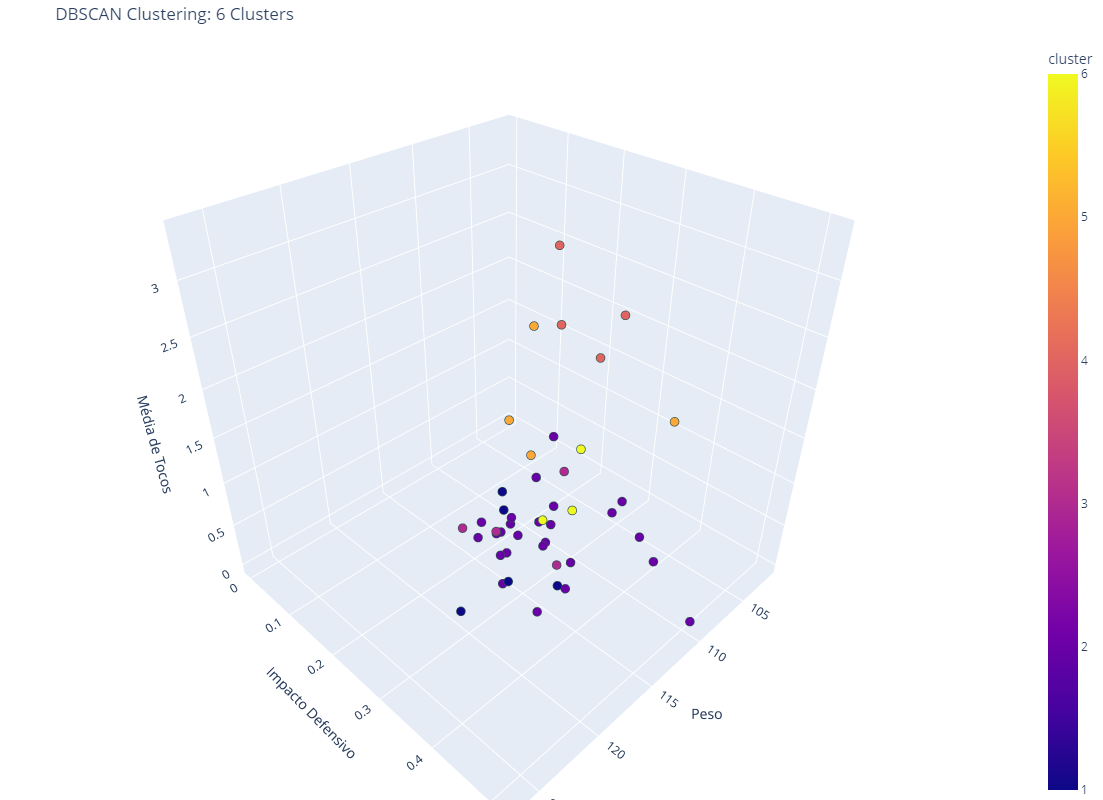

In [345]:
import plotly.express as px
import pandas as pd

# Supondo que _df seja o DataFrame com os clusters
# Certifique-se de que _df contém 'peso', 'impacto_defensivo', 'media_tocos' e 'cluster'

fig = px.scatter_3d(
    _df,
    x='peso',  # Eixo X
    y='impacto_defensivo',  # Eixo Y
    z='media_tocos',  # Eixo Z
    color='cluster',  # Clusters como cores
    color_discrete_sequence=px.colors.qualitative.Pastel2,
    title=f"DBSCAN Clustering: {len(unique_labels) - (1 if -1 in unique_labels else 0)} Clusters",
    labels={'peso': 'Peso', 'impacto_defensivo': 'Impacto Defensivo', 'media_tocos': 'Média de Tocos'},
)

# Melhorar layout do gráfico
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Peso'),
        yaxis=dict(title='Impacto Defensivo'),
        zaxis=dict(title='Média de Tocos'),
    ),
    legend_title="Clusters",
    margin=dict(l=0, r=0, b=0, t=40),
    height=800
)

# Mostrar o gráfico
fig.show()


#### Cluster 0

In [317]:
cluster_0 = clusters_df[clusters_df['cluster'] == 0]
cluster_0

,media_assistencias,media_tocos,peso,rebotes_por_minuto,impacto_defensivo,id_posicao,id_posicao_encoded,cluster
4080,2.432836,1.417911,108.860000,0.278323,0.320696,C,0,0
2182,0.000000,0.500000,112.928978,0.300000,0.400000,C,0,0
5927,0.130435,0.826087,113.505512,0.286652,0.369803,C,0,0
5928,0.100000,0.266667,113.505512,0.287671,0.342466,C,0,0
5944,0.254902,0.215686,112.515678,0.249476,0.272537,C,0,0
...,...,...,...,...,...,...,...,...
1151,2.958333,0.263889,106.249393,0.114694,0.121656,SG,7,0
5931,0.500000,0.000000,102.617348,0.131148,0.131148,SG,7,0
5930,0.866667,0.333333,102.617348,0.190383,0.208538,SG,7,0
5728,2.081967,0.147541,90.720000,0.076869,0.083216,SG,7,0


In [318]:
cluster_0.id_posicao_encoded.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

#### Cluster 1

In [346]:
cluster_1 = clusters_df[clusters_df['cluster'] == 1]
cluster_1

,media_rebotes,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_assistencias,tentativas_3pontos,assistencias,media_tocos,tocos,altura,peso,rebotes_por_minuto,impacto_defensivo,eficiencia_3pontos,prop_tentativas_3pontos,id_posicao,id_posicao_encoded,cluster
5742,7.616667,0.016667,0.033333,50.000000,0.500000,2.0,30.0,1.583333,95.0,2.11,126.550000,0.367659,0.444087,0.833333,0.005848,C,0,1
1595,5.297297,0.040541,0.094595,42.857143,0.324324,7.0,24.0,1.202703,89.0,2.05,116.393715,0.236287,0.289030,1.737452,0.013308,C,0,1
4612,5.735294,0.044118,0.088235,50.000000,0.544118,6.0,37.0,1.382353,94.0,2.13,122.470000,0.345133,0.426991,2.205882,0.019608,C,0,1
2989,7.347826,0.043478,0.072464,60.000002,0.652174,5.0,45.0,1.144928,79.0,2.05,119.574131,0.388208,0.446401,2.608696,0.018051,C,0,1
485,5.524390,0.012195,0.024390,50.000000,0.451219,2.0,37.0,1.024390,84.0,2.05,116.485535,0.249038,0.293568,0.609756,0.005025,C,0,1


In [320]:
cluster_1.id_posicao_encoded.unique()

array([5])

#### Cluster 2

In [347]:
cluster_2 = clusters_df[clusters_df['cluster'] == 2]
cluster_2

,media_rebotes,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_assistencias,tentativas_3pontos,assistencias,media_tocos,tocos,altura,peso,rebotes_por_minuto,impacto_defensivo,eficiencia_3pontos,prop_tentativas_3pontos,id_posicao,id_posicao_encoded,cluster
2165,2.081633,0.020408,0.020408,100.0,0.448980,1.0,22.0,0.183673,9.0,2.04,113.583748,0.172007,0.184654,2.040816,0.014085,C,0,2
5556,4.342857,0.014286,0.014286,100.0,0.442857,1.0,31.0,0.457143,32.0,2.04,113.489670,0.282004,0.311688,1.428571,0.002639,C,0,2
852,2.456522,0.021739,0.021739,100.0,0.130435,1.0,6.0,0.282609,13.0,2.05,117.261040,0.275610,0.307317,2.173913,0.018519,C,0,2
6157,5.000000,0.016667,0.016667,100.0,0.650000,1.0,39.0,0.833333,50.0,2.08,120.200000,0.366748,0.427873,1.666667,0.004405,C,0,2
4358,4.539682,0.015873,0.015873,100.0,0.222222,1.0,14.0,0.841270,53.0,2.05,117.782028,0.360202,0.426952,1.587302,0.005348,C,0,2
7430,4.603448,0.051724,0.051724,100.0,0.396552,3.0,23.0,0.568966,33.0,2.05,110.611610,0.402715,0.450226,5.172414,0.015873,C,0,2
8002,6.400000,0.015385,0.015385,100.0,0.584615,1.0,38.0,1.092308,71.0,2.13,111.130000,0.341544,0.398604,1.538461,0.003195,C,0,2
3498,3.796610,0.016949,0.016949,100.0,0.762712,1.0,45.0,0.389831,23.0,2.04,113.898560,0.243478,0.266848,1.694915,0.003846,C,0,2
3522,2.875000,0.041667,0.041667,100.0,0.416667,1.0,10.0,0.166667,4.0,2.04,110.565361,0.229236,0.242525,4.166667,0.010204,C,0,2
2350,5.872340,0.021277,0.021277,100.0,0.446809,1.0,21.0,1.127660,53.0,2.05,117.608479,0.360784,0.430065,2.127660,0.003953,C,0,2


In [200]:
cluster_2.id_posicao_encoded.unique()

array([5])